# ¿Cuántas pelotas ve? 

# Carpa de Melquiades, Feria de Cali 2021

[galton](http://wisdomofcrowds.blogspot.com/2009/12/vox-populi-sir-francis-galton.html?m=1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
convert = lambda s: float(s) #Para convertir caracteres a float 

### Lectura de los datos almacenados en "concurso_dataDoct.csv" 

In [3]:
import csv

with open("concurso_dataDoct.csv" ) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',' )
    time,  count = [], [] 
    for row in readCSV:
        tt  =  row[0]
        yy  =  convert(row[6])
        time.append(tt)
        count.append(yy)

In [4]:
# Estadísticos fundamentales: valor esperado (mu) y desviación estandar (sigma) de los datos

s  = np.std(np.array(count))
m = np.mean(np.array(count))
media = np.median(count)

In [5]:
from scipy.stats import norm

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

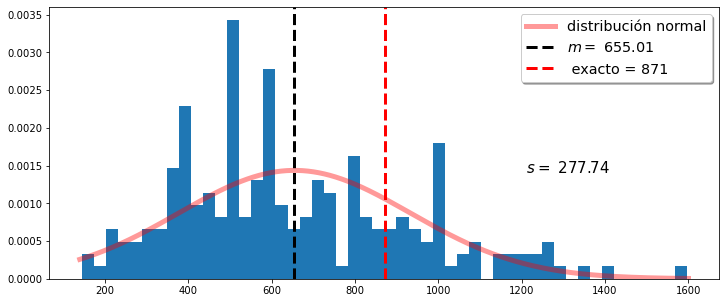

In [27]:
x = np.linspace(140,1600, 2500)
n_bins = 50
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(count, bins=n_bins, density=True)
ax.plot(x, norm.pdf(x, m, s), 'r-', lw=5, alpha=0.4, label='distribución normal')
ax.axvline(x=m, color='k', lw = 3, linestyle='--', label= r'$ m=$' f" {m:.2f} ")
ax.axvline(x=871, color='r', lw = 3, linestyle='--', label=   f" exacto = {871} ")
ax.text(1200, 0.0014, r" $ s =  $"  f" {s:.2f} ",  color="k", fontsize=15)
ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

In [33]:
# Prueba de no normalidad de la variable X (count en este note book)

from scipy.stats import normaltest

k2, p = normaltest(count)

alpha = 1e-1

print("p = {:g}".format(p))
p = 8.4713e-19

if p < alpha:  # hipothesis nula: X tiene una distribución normal

    print("Se rechaza la hipótesis nula")

else:

    print("No hay elementos de juicio para rechazar la hipótesis nula")
 

p = 0.00156014
Se rechaza la hipótesis nula


## Remuestreo para determinar la promediación $P_Q$

[np.random](https://numpy.org/doc/stable/reference/random/index.html)

In [31]:
muestreoPromedio = lambda q:  np.mean(np.random.choice(count, size=q, replace=True, p=None))

In [28]:
promedios = [muestreoPromedio(20) for i in range(15000)]
ms = np.mean(promedios)
ss = np.std(promedios)

In [29]:
(ms, ss)

(654.8702033333334, 62.1812939100283)

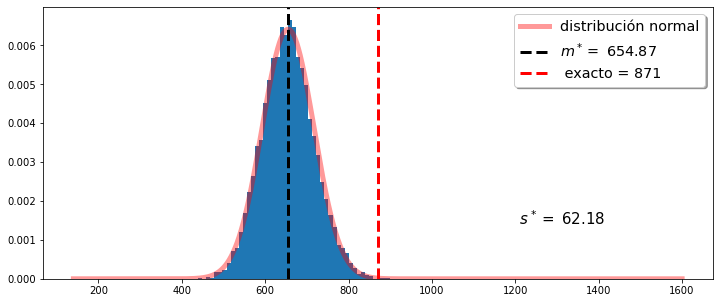

In [30]:
x = np.linspace(140,1600, 2500)
n_bins = 50
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(promedios, bins=n_bins, density=True)
ax.plot(x, norm.pdf(x,ms, ss), 'r-', lw=5, alpha=0.4, label='distribución normal')
ax.axvline(x=ms, color='k', lw = 3, linestyle='--', label= r'$ m^*=$' f" {ms:.2f} ")
ax.axvline(x=871, color='r', lw = 3, linestyle='--', label=   f" exacto = {871} ")
 
ax.text(1200, 0.0014, r" $ s^* =  $"  f" {ss:.2f} ",  color="k", fontsize=15)
ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

In [32]:
# Prueba de normalidad de la variable aleatoria P_Q

k2, p = normaltest(promedios)

alpha = 1e-3

#print("p = {:g}".format(p))
#p = 8.4713e-19

if p < alpha:  # hipothesis nula: Promedios  NO tiene una distribución normal

    print("Se rechaza la hipótesis nula")

else:

    print("No hay elementos de juicio para rechazar la hipótesis nula")

Se rechaza la hipótesis nula


In [25]:
p

1.601991682974342e-17